## Application of general regression neural network in identifying interfacial parameters under mixed-mode fracture

In [1]:
import os
os.getcwd()

'C:\\Users\\Dell'

In [2]:
os.chdir("D:\\1.sem7\BTP S\\btp after msem\\codes")

In [3]:
os.getcwd()

'D:\\1.sem7\\BTP S\\btp after msem\\codes'

In [4]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


In [5]:
# Define the GRNN class
class GRNN:
    def __init__(self, sigma):
        self.sigma = sigma  # Smoothing factor
        self.X_train = None
        self.Y_train = None

    def fit(self, X, Y):
        self.X_train = X
        self.Y_train = Y

    def predict(self, X):
        # Compute the Euclidean distances
        distances = np.linalg.norm(X[:, np.newaxis] - self.X_train, axis=2)

        # Compute the kernel
        kernel = np.exp(-distances ** 2 / (2 * self.sigma ** 2))

        # Predict the output for each parameter
        predicted = np.zeros((X.shape[0], self.Y_train.shape[1]))

        for i in range(self.Y_train.shape[1]):
            predicted[:, i] = np.dot(kernel, self.Y_train[:, i]) / np.sum(kernel, axis=1)

        return predicted


In [6]:
# Load the interfacial parameters
params_file_path = 'D:\\1.sem7\\BTP S\\btp after msem\\data set rps\\Interfacial parameters 10samp data.xlsx'
interfacial_params = pd.read_excel(params_file_path, header=0).iloc[:, 1:].values

# Ensure interfacial parameters are numeric
interfacial_params = interfacial_params.astype(float)
print(interfacial_params)


[[1.60e+02 2.40e-02 8.00e-02 8.00e+01 1.20e+08 1.20e+08 1.00e+08]
 [1.80e+02 2.70e-02 9.00e-02 9.00e+01 1.35e+08 1.35e+08 1.00e+08]
 [2.20e+02 3.30e-02 1.10e-01 1.10e+02 1.65e+08 1.65e+08 1.00e+08]
 [2.40e+02 3.60e-02 1.20e-01 1.20e+02 1.80e+08 1.80e+08 1.00e+08]
 [1.60e+02 2.70e-02 8.00e-02 8.00e+01 1.20e+08 1.20e+08 1.00e+08]
 [2.40e+02 2.70e-02 8.00e-02 8.00e+01 1.20e+08 1.20e+08 1.00e+08]
 [2.20e+02 3.30e-02 1.10e-01 8.00e+01 1.80e+08 1.20e+08 1.00e+08]
 [1.80e+02 3.30e-02 8.00e-02 1.20e+02 1.35e+08 1.50e+08 1.00e+08]
 [2.00e+02 2.40e-02 1.10e-01 1.10e+02 1.20e+08 1.20e+08 1.00e+08]
 [2.20e+02 2.40e-02 1.00e-01 8.00e+01 1.50e+08 1.20e+08 1.00e+08]]


In [7]:
# Load sample data from the folder
samples_folder_path = 'D:\\1.sem7\\BTP S\\btp after msem\\data set rps\\train,test .samples\\*.csv'

X_all = []
Y_all = []

for file_path in glob.glob(samples_folder_path):
    data = pd.read_csv(file_path, encoding='utf-8', on_bad_lines='skip')
    # Combine force and displacement as input features
    X = data[['Displacement', 'Force']].values  # Use both columns as input features
    sample_index = int(file_path.split('\\')[-1].split('.')[0].replace('sample', ''))
    Y = interfacial_params[sample_index - 1]
    Y_repeated = np.tile(Y, (X.shape[0], 1))  # Repeat Y for each displacement-force pair
    X_all.append(X)
    Y_all.append(Y_repeated)

X_all = np.vstack(X_all)
Y_all = np.vstack(Y_all)

# Print the first few rows of X_all and Y_all
print("First few rows of X_all (input features):")
print(X_all[:5])  # Print the first 5 rows of X_all

print("\nFirst few rows of Y_all (repeated interfacial parameters):")
print(Y_all[:5])  # Print the first 5 rows of Y_all


First few rows of X_all (input features):
[[0.00000000e+00 0.00000000e+00]
 [1.00000000e-04 0.00000000e+00]
 [2.00000000e-04 0.00000000e+00]
 [3.00000000e-04 0.00000000e+00]
 [4.00000000e-04 1.06456001e-01]]

First few rows of Y_all (repeated interfacial parameters):
[[1.6e+02 2.4e-02 8.0e-02 8.0e+01 1.2e+08 1.2e+08 1.0e+08]
 [1.6e+02 2.4e-02 8.0e-02 8.0e+01 1.2e+08 1.2e+08 1.0e+08]
 [1.6e+02 2.4e-02 8.0e-02 8.0e+01 1.2e+08 1.2e+08 1.0e+08]
 [1.6e+02 2.4e-02 8.0e-02 8.0e+01 1.2e+08 1.2e+08 1.0e+08]
 [1.6e+02 2.4e-02 8.0e-02 8.0e+01 1.2e+08 1.2e+08 1.0e+08]]


In [8]:
# Save X_all to a CSV file
X_df = pd.DataFrame(X_all, columns=['Displacement', 'Force'])
X_df.to_csv('X_all.csv', index=False)

# Save Y_all to a CSV file
Y_df = pd.DataFrame(Y_all)  # Assuming Y_all has multiple interfacial parameters
Y_df.to_csv('Y_all.csv', index=False)

print("Files saved as X_all.csv and Y_all.csv.")

Files saved as X_all.csv and Y_all.csv.


In [9]:
print("Size of X_all (input features):", X_all.shape)
print("Size of Y_all (interfacial parameters):", Y_all.shape)

Size of X_all (input features): (6000, 2)
Size of Y_all (interfacial parameters): (6000, 7)


Optimal Smoothing Factor (Sigma): 5.0


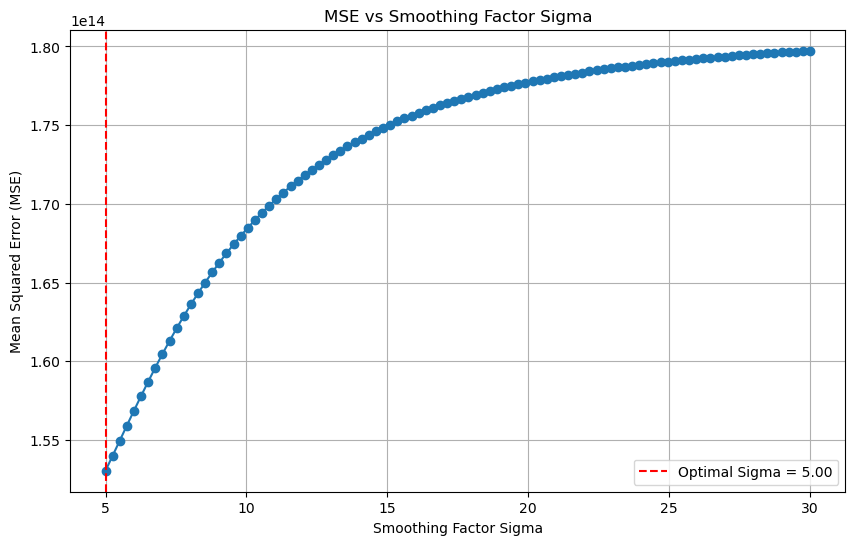

In [10]:
# Function to evaluate different sigma values using LOOCV
def evaluate_sigma(X, Y, sigma_values):
    mse_values = []
    n_samples = Y.shape[0] // 601  # Assuming each sample has 601 points

    for sigma in sigma_values:
        model = GRNN(sigma)
        total_mse = 0
        
        for i in range(n_samples):
            # Leave-one-out cross-validation
            X_train = np.delete(X, np.s_[i * 601:(i + 1) * 601], axis=0)
            Y_train = np.delete(Y, np.s_[i * 601:(i + 1) * 601], axis=0)
            X_val = X[i * 601:(i + 1) * 601]
            Y_val = Y[i * 601:(i + 1) * 601]

            model.fit(X_train, Y_train)
            predicted = model.predict(X_val)
            total_mse += mean_squared_error(Y_val, predicted)
        
        # Compute average MSE for this sigma value
        avg_mse = total_mse / n_samples
        mse_values.append(avg_mse)

    return mse_values

# Range of sigma values to evaluate
sigma_values = np.linspace(5, 30, 100)  # Adjust the range around the expected optimum
mse_values = evaluate_sigma(X_all, Y_all, sigma_values)

# Find the optimal sigma
optimal_sigma_index = np.argmin(mse_values)
optimal_sigma = sigma_values[optimal_sigma_index]
print(f"Optimal Smoothing Factor (Sigma): {optimal_sigma}")

# Plot MSE vs Sigma
plt.figure(figsize=(10, 6))
plt.plot(sigma_values, mse_values, marker='o')
plt.title('MSE vs Smoothing Factor Sigma')
plt.xlabel('Smoothing Factor Sigma')
plt.ylabel('Mean Squared Error (MSE)')
plt.axvline(optimal_sigma, color='r', linestyle='--', label=f'Optimal Sigma = {optimal_sigma:.2f}')
plt.legend()
plt.grid()
plt.show()

In [11]:
# Load the new sample data (force vs. displacement data)
import pandas as pd
new_sample_file_path = 'D:\\1.sem7\BTP S\\btp after msem\\data set rps\\example\\fvs disp exampple data.csv'
new_sample_data = pd.read_csv(new_sample_file_path, encoding='utf-8')

# Extract displacement and force values from the new sample
new_input_values = new_sample_data[['Displacement', 'Force']].values

# Predict the interfacial parameters using the trained GRNN model
grnn_model = GRNN(sigma=optimal_sigma)
grnn_model.fit(X_all, Y_all)
predicted_params = grnn_model.predict(new_input_values)

# Save predictions to a CSV file
predictions_df = pd.DataFrame(predicted_params, columns=[f'Param_{i + 1}' for i in range(predicted_params.shape[1])])
predictions_df.to_csv('predicted_new_interfacial_parameters.csv', index=False)

print("Predicted interfacial parameters for the new sample saved to: predicted_new_interfacial_parameters.csv")


Predicted interfacial parameters for the new sample saved to: predicted_new_interfacial_parameters.csv


In [12]:
print(predictions_df[:1])  # Print the first 5 rows of X_all


        Param_1   Param_2   Param_3    Param_4       Param_5       Param_6  \
0    202.000000  0.028800  0.096000  95.000000  1.425000e+08  1.350000e+08   
1    202.000000  0.028800  0.096000  95.000000  1.425000e+08  1.350000e+08   
2    202.000000  0.028800  0.096000  95.000000  1.425000e+08  1.350000e+08   
3    202.000000  0.028800  0.096000  95.000000  1.425000e+08  1.350000e+08   
4    202.000000  0.028800  0.096000  95.000000  1.425000e+08  1.350000e+08   
..          ...       ...       ...        ...           ...           ...   
595  200.898274  0.028327  0.095593  93.863703  1.408613e+08  1.320381e+08   
596  200.884310  0.028319  0.095569  93.802655  1.408432e+08  1.319844e+08   
597  200.870427  0.028312  0.095545  93.741867  1.408252e+08  1.319310e+08   
598  200.856624  0.028304  0.095521  93.681340  1.408073e+08  1.318780e+08   
599  200.842725  0.028297  0.095497  93.620304  1.407894e+08  1.318246e+08   

         Param_7  
0    100000000.0  
1    100000000.0  
2    1

In [13]:
# Experimental values provided
experimental_values = np.array([200, 0.030, 0.10, 100.00, 1.50e8, 1.50e8])

# Take the average of the predicted interfacial parameters across all predicted samples
average_predicted_params = np.mean(predicted_params, axis=0)

# Select only the first 6 parameters as per the experimental values (if predicted values contain more than 6)
average_predicted_params = average_predicted_params[:6]

# Calculate the percentage deviations for each parameter
deviations = np.abs((average_predicted_params - experimental_values) / experimental_values) * 100

# Calculate the overall mean deviation across all parameters
mean_deviation = np.mean(deviations)

# Print the average predicted parameters and the deviations
print("Average Predicted Interfacial Parameters: ", average_predicted_params)
print("Deviations (%) for each parameter: ", deviations)
print(f"Mean Deviation (%): {mean_deviation:.2f}%")


Average Predicted Interfacial Parameters:  [2.01876162e+02 2.89096490e-02 9.66474625e-02 9.70086599e+01
 1.42393095e+08 1.35948379e+08]
Deviations (%) for each parameter:  [0.93808108 3.63450323 3.35253751 2.9913401  5.07127028 9.36774764]
Mean Deviation (%): 4.23%
